In [2529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1729)

In [2530]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2531]:
train['application_date'] = pd.to_datetime(train['application_date'],format='%d-%m-%y')
test['application_date'] = pd.to_datetime(test['application_date'],format='%Y-%m-%d')

In [2190]:
test

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1
5,6,2019-07-11,1
6,7,2019-07-12,1
7,8,2019-07-13,1
8,9,2019-07-14,1
9,10,2019-07-15,1


In [2532]:
dftrain = train.pivot_table(index = ['application_date','segment'],values='case_count',aggfunc='sum')
dftrain.reset_index(inplace=True)
dftrain.set_index('application_date',drop=True,inplace=True)
dftrain.head()

,segment,case_count
application_date,,
2017-04-01,1,299
2017-04-01,2,897
2017-04-02,2,605
2017-04-03,1,42
2017-04-03,2,2016


In [2533]:
dftest = test.drop(columns=['id'])
dftest.set_index('application_date',drop=True,inplace=True)

In [2534]:
dftrain['segment'].replace(1,0,inplace=True)
dftrain['segment'].replace(2,1,inplace=True)

In [2535]:
dftest['segment'].replace(1,0,inplace=True)
dftest['segment'].replace(2,1,inplace=True)

In [2536]:
total_train0 = dftrain[dftrain['segment']==0]
total_train1 = dftrain[dftrain['segment']==1]
total_test0 = dftest[dftest['segment']==0]
total_test1 = dftest[dftest['segment']==1]

In [428]:
idx = pd.date_range('2017-04-01','2019-07-05')
total_train0 = total_train0.reindex(idx, fill_value=0)

In [2537]:
total0 = pd.concat([total_train0,total_test0],axis=0,sort=False)
total1 = pd.concat([total_train1,total_test1],axis=0,sort=False)

In [1930]:
total0.to_csv('total0.csv')
total1.to_csv('total1.csv')

In [2438]:
total0 = pd.read_csv('total0.csv',parse_dates=['application_date'],index_col='application_date')
total1 = pd.read_csv('total1.csv',parse_dates=['application_date'],index_col='application_date')

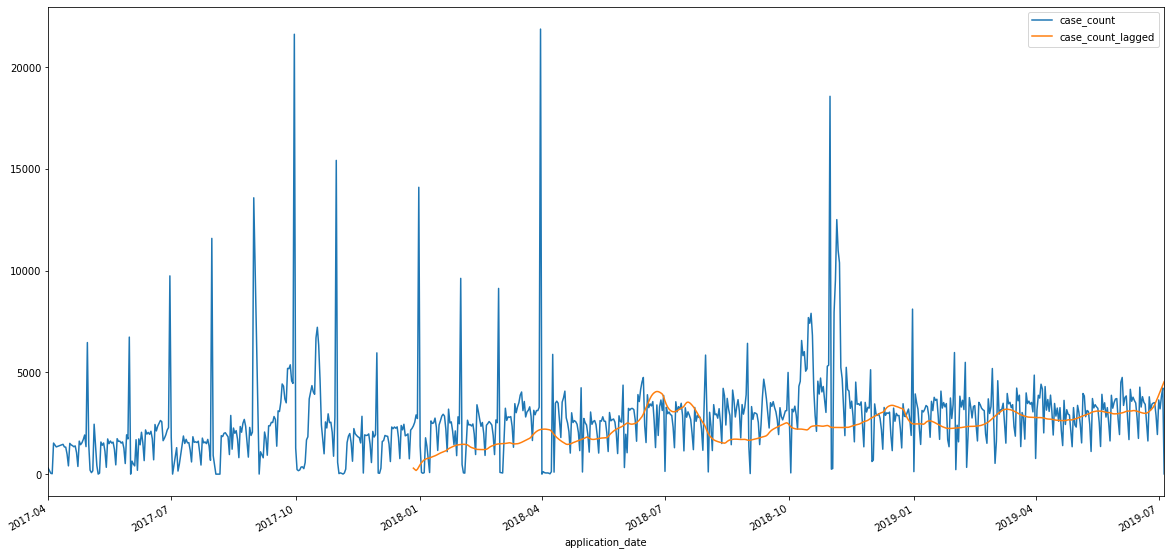

In [1112]:
plt.figure(figsize=(20,10))
total_train0["case_count"].plot(legend=True)
shifted = total_train0["case_count"].shift(254).rolling(window=30,min_periods=1,win_type='triang').mean().plot(legend=True)
shifted.legend(['case_count','case_count_lagged'])
plt.show()

In [1933]:
# total0[total0['segment']==0]
total1.tail()

,segment,case_count,interest
application_date,,,
2019-10-20,1,NaN,9.4
2019-10-21,1,NaN,9.4
2019-10-22,1,NaN,9.4
2019-10-23,1,NaN,9.4
2019-10-24,1,NaN,9.4


### Creating Shifted Rolling and lag features for time series

In [2439]:
for i in range(93,125,7):
    total0['rol_mean_7_'+str(i)] = total0.groupby(['segment'])['case_count'].transform(lambda x:x.shift(i).rolling(window=30,min_periods=1,win_type='triang').mean()+np.random.normal(scale=1.6))
    total0['lag_'+str(i)] = total0.groupby(['segment'])['case_count'].transform(lambda x:x.shift(i))

for j in range(87,308,30):
    total1['rol_14_30_'+str(j)] = total1.groupby(['segment'])['case_count'].transform(lambda x:x.shift(j).rolling(window=14,min_periods=1,win_type='triang').mean()+np.random.normal(scale=1.6))    
    total1['lag_'+str(j)] = total1.groupby(['segment'])['case_count'].transform(lambda x:x.shift(j))

### DateTime Features

In [2538]:
total0['Year'] = total0.index.year
total0['Month'] = total0.index.month
total0['Day'] = total0.index.day

total0['Dayofweek'] = total0.index.dayofweek
# total0['Weekofyear'] = total0.index.weekofyear
total0['Dayofyear'] = total0.index.dayofyear

total0['is_month_end'] = total0.index.is_month_end
# total0['is_month_start'] = total0.index.is_month_start

total0['is_year_end'] = total0.index.is_year_end
total0['is_year_start'] = total0.index.is_year_start
# total0['quarter'] = total0.index.quarter
total0['Weekend'] = ((pd.DatetimeIndex(total0.index).dayofweek) // 5 == 1).astype(float)

In [2539]:
total1['Year'] = total1.index.year
total1['Month'] = total1.index.month
total1['Day'] = total1.index.day

total1['Dayofweek'] = total1.index.dayofweek
# total1['Weekofyear'] = total1.index.weekofyear
total1['Dayofyear'] = total1.index.dayofyear

total1['is_month_end'] = total1.index.is_month_end
# total1['is_month_start'] = total1.index.is_month_start

total1['is_year_end'] = total1.index.is_year_end
total1['is_year_start'] = total1.index.is_year_start
# total1['quarter'] = total1.index.quarter
total1['Weekend'] = ((pd.DatetimeIndex(total1.index).dayofweek) // 5 == 1).astype(float)

In [2540]:
import datetime

In [2541]:
total0.index.min(),total0.index.max()

(Timestamp('2017-04-01 00:00:00'), Timestamp('2019-09-30 00:00:00'))

In [2542]:
total1.index.min(),total1.index.max()

(Timestamp('2017-04-01 00:00:00'), Timestamp('2019-10-24 00:00:00'))

### Holiday Features

In [2543]:
from pandas.tseries.holiday import *
from dateutil.relativedelta import MO
from pandas import DateOffset, Series, Timestamp, date_range
from pandas.tseries.offsets import Day, Easter

class IND(AbstractHolidayCalendar):
    rules = {
        Holiday('New Year',day=1,month=1),
        Holiday('Makar Sankranti',day=14,month=1),
        Holiday('Republic Day',month=1, day=26),
        Holiday("Independence day", month=8, day=15),
#         Holiday("Easter Monday", month=1, day=1, offset=[Easter(), Day(1)]),
        Holiday("Gandhi day", month=10, day=2),
#         Holiday('Christmas',month=12, day=25),
        Holiday('Christmas Day',month=12,day=25),
#         Holiday('Boxing Day',month=12,day=26,observance=next_workday)
        Holiday('Good Friday',month=4,day=14,year=2017),
        Holiday('EID',month=6,day=26,year=2017),
        Holiday('Bakri EID',month=9,day=2,year=2017),
        Holiday('Dussehra',month=9,day=30,year=2017),
        Holiday('Muharram',month=10,day=1,year=2017),
        Holiday('Diwali',month=10,day=19,year=2017),
        Holiday('Holi',month=3,day=2,year=2018),
        Holiday('Good Friday',month=3,day=30,year=2018),
        Holiday('EID',month=6,day=16,year=2018),
        Holiday('Bakri EID',month=8,day=22,year=2018),
        Holiday('Dussehra',month=10,day=19,year=2018),
        Holiday('Muharram',month=9,day=21,year=2018),
        Holiday('Diwali',month=11,day=7,year=2018),
        Holiday('Holi',month=3,day=21,year=2019),
        Holiday('Good Friday',month=4,day=19,year=2019),
        Holiday('EID',month=6,day=5,year=2019),
        Holiday('Bakri EID',month=8,day=12,year=2019),
        Holiday('Dussehra',month=10,day=8,year=2019),
        Holiday('Muharram',month=9,day=10,year=2019),
        Holiday('Diwali',month=10,day=27,year=2019),
        
    }

In [2544]:
cal = IND()
h0 = cal.holidays(start=total0.index.min(), end=total0.index.max())
total0['Holiday'] = total0.index.isin(h0)
total0['Holiday'] = total0['Holiday'].astype(int)

h1 = cal.holidays(start=total1.index.min(), end=total1.index.max())
total1['Holiday'] = total1.index.isin(h1)
total1['Holiday'] = total1['Holiday'].astype(int)

In [2545]:
h1

DatetimeIndex(['2017-04-14', '2017-06-26', '2017-08-15', '2017-09-02',
               '2017-09-30', '2017-10-01', '2017-10-02', '2017-10-19',
               '2017-12-25', '2018-01-01', '2018-01-14', '2018-01-26',
               '2018-03-02', '2018-03-30', '2018-06-16', '2018-08-15',
               '2018-08-22', '2018-09-21', '2018-10-02', '2018-10-19',
               '2018-11-07', '2018-12-25', '2019-01-01', '2019-01-14',
               '2019-01-26', '2019-03-21', '2019-04-19', '2019-06-05',
               '2019-08-12', '2019-08-15', '2019-09-10', '2019-10-02',
               '2019-10-08'],
              dtype='datetime64[ns]', freq=None)

In [2546]:
target0 = total_train0['case_count']
target1 = total_train1['case_count']

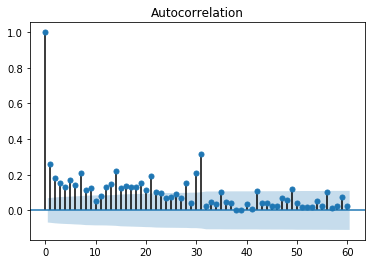

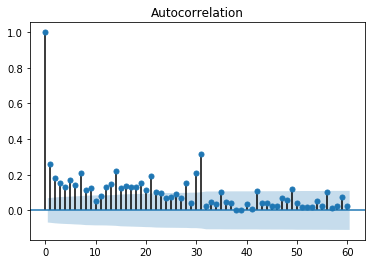

In [254]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(total_train0['case_count'], lags=60)

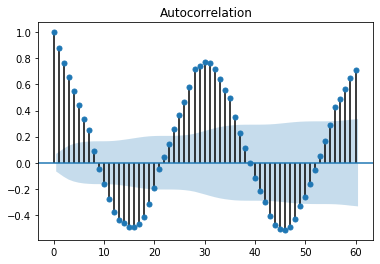

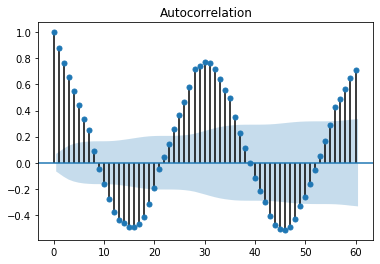

In [249]:
plot_acf(total_train1['case_count'],lags=180)

In [2547]:
total0.columns,total1.columns

(Index(['segment', 'case_count', 'Year', 'Month', 'Day', 'Dayofweek',
        'Dayofyear', 'is_month_end', 'is_year_end', 'is_year_start', 'Weekend',
        'Holiday'],
       dtype='object'),
 Index(['segment', 'case_count', 'Year', 'Month', 'Day', 'Dayofweek',
        'Dayofyear', 'is_month_end', 'is_year_end', 'is_year_start', 'Weekend',
        'Holiday'],
       dtype='object'))

In [2304]:
total0['date'] = total0.index
total1['date'] = total1.index

### Creating distance feature from Holidays and given date upto 30 days

In [2305]:
total0['Indepence_day_2017'] = np.abs(total0['date']-pd.to_datetime('15-08-2017',format='%d-%m-%Y')).dt.days
total0['Indepence_day_2018'] = np.abs(total0['date']-pd.to_datetime('15-08-2018',format='%d-%m-%Y')).dt.days
total0['Indepence_day_2019'] = np.abs(total0['date']-pd.to_datetime('15-08-2019',format='%d-%m-%Y')).dt.days

total0['Makar_2017'] = np.abs(total0['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days
total0['Makar_2018'] = np.abs(total0['date']-pd.to_datetime('14-01-2018',format='%d-%m-%Y')).dt.days
total0['Makar_2019'] = np.abs(total0['date']-pd.to_datetime('14-01-2019',format='%d-%m-%Y')).dt.days

total0['Good_2017'] = np.abs(total0['date']-pd.to_datetime('14-04-2017',format='%d-%m-%Y')).dt.days
total0['Good_2018'] = np.abs(total0['date']-pd.to_datetime('30-03-2018',format='%d-%m-%Y')).dt.days
total0['Good_2019'] = np.abs(total0['date']-pd.to_datetime('19-04-2019',format='%d-%m-%Y')).dt.days

total0['EID_2017'] = np.abs(total0['date']-pd.to_datetime('26-06-2017',format='%d-%m-%Y')).dt.days
total0['EID_2018'] = np.abs(total0['date']-pd.to_datetime('16-06-2018',format='%d-%m-%Y')).dt.days
total0['EID_2019'] = np.abs(total0['date']-pd.to_datetime('05-06-2019',format='%d-%m-%Y')).dt.days

total0['Bakri_2017'] = np.abs(total0['date']-pd.to_datetime('02-09-2017',format='%d-%m-%Y')).dt.days
total0['Bakri_2018'] = np.abs(total0['date']-pd.to_datetime('22-08-2018',format='%d-%m-%Y')).dt.days
total0['Bakri_2019'] = np.abs(total0['date']-pd.to_datetime('12-08-2019',format='%d-%m-%Y')).dt.days

total0['Dussehra_2017'] = np.abs(total0['date']-pd.to_datetime('30-09-2017',format='%d-%m-%Y')).dt.days
total0['Dussehra_2018'] = np.abs(total0['date']-pd.to_datetime('19-10-2018',format='%d-%m-%Y')).dt.days
total0['Dussehra_2019'] = np.abs(total0['date']-pd.to_datetime('08-10-2019',format='%d-%m-%Y')).dt.days

total0['Muharram_2017'] = np.abs(total0['date']-pd.to_datetime('01-10-2017',format='%d-%m-%Y')).dt.days
total0['Muharram_2018'] = np.abs(total0['date']-pd.to_datetime('21-09-2018',format='%d-%m-%Y')).dt.days
total0['Muharram_2019'] = np.abs(total0['date']-pd.to_datetime('10-09-2019',format='%d-%m-%Y')).dt.days

total0['Diwali_2017'] = np.abs(total0['date']-pd.to_datetime('19-10-2017',format='%d-%m-%Y')).dt.days
total0['Diwali_2018'] = np.abs(total0['date']-pd.to_datetime('07-11-2018',format='%d-%m-%Y')).dt.days
total0['Diwali_2019'] = np.abs(total0['date']-pd.to_datetime('27-10-2019',format='%d-%m-%Y')).dt.days

total0['Holi_2017'] = np.abs(total0['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days
total0['Holi_2018'] = np.abs(total0['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days
total0['Holi_2019'] = np.abs(total0['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days

total0['christmas_2018_'] = np.abs(total0['date']-pd.to_datetime('25-12-2017',format='%d-%m-%Y')).dt.days
total0['christmas_2017'] = np.abs(total0['date']-pd.to_datetime('25-12-2017',format='%d-%m-%Y')).dt.days
total0['christmas_2018'] = np.abs(total0['date']-pd.to_datetime('25-12-2018',format='%d-%m-%Y')).dt.days
total0['christmas_2019_'] = np.abs(total0['date']-pd.to_datetime('25-12-2018',format='%d-%m-%Y')).dt.days

total0['New Year_2017_'] = np.abs(total0['date']-pd.to_datetime('01-01-2018',format='%d-%m-%Y')).dt.days
total0['New Year_2018'] = np.abs(total0['date']-pd.to_datetime('01-01-2018',format='%d-%m-%Y')).dt.days
total0['New Year_2018_'] = np.abs(total0['date']-pd.to_datetime('01-01-2019',format='%d-%m-%Y')).dt.days
total0['New Year_2019'] = np.abs(total0['date']-pd.to_datetime('01-01-2019',format='%d-%m-%Y')).dt.days

total0['Republic Day_2018'] = np.abs(total0['date']-pd.to_datetime('26-01-2018',format='%d-%m-%Y')).dt.days
total0['Republic Day_2019'] = np.abs(total0['date']-pd.to_datetime('26-01-2019',format='%d-%m-%Y')).dt.days

total0['Gandhi_2017'] = np.abs(total0['date']-pd.to_datetime('02-10-2017',format='%d-%m-%Y')).dt.days
total0['Gandhi_2018'] = np.abs(total0['date']-pd.to_datetime('02-10-2018',format='%d-%m-%Y')).dt.days
total0['Gandhi_2019'] = np.abs(total0['date']-pd.to_datetime('02-10-2019',format='%d-%m-%Y')).dt.days

In [2306]:
total1['Indepence_day_2017'] = np.abs(total1['date']-pd.to_datetime('15-08-2017',format='%d-%m-%Y')).dt.days
total1['Indepence_day_2018'] = np.abs(total1['date']-pd.to_datetime('15-08-2018',format='%d-%m-%Y')).dt.days
total1['Indepence_day_2019'] = np.abs(total1['date']-pd.to_datetime('15-08-2019',format='%d-%m-%Y')).dt.days

total1['Makar_2017'] = np.abs(total1['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days
total1['Makar_2018'] = np.abs(total1['date']-pd.to_datetime('14-01-2018',format='%d-%m-%Y')).dt.days
total1['Makar_2019'] = np.abs(total1['date']-pd.to_datetime('14-01-2019',format='%d-%m-%Y')).dt.days

total1['Good_2017'] = np.abs(total1['date']-pd.to_datetime('14-04-2017',format='%d-%m-%Y')).dt.days
total1['Good_2018'] = np.abs(total1['date']-pd.to_datetime('30-03-2018',format='%d-%m-%Y')).dt.days
total1['Good_2019'] = np.abs(total1['date']-pd.to_datetime('19-04-2019',format='%d-%m-%Y')).dt.days

total1['EID_2017'] = np.abs(total1['date']-pd.to_datetime('26-06-2017',format='%d-%m-%Y')).dt.days
total1['EID_2018'] = np.abs(total1['date']-pd.to_datetime('16-06-2018',format='%d-%m-%Y')).dt.days
total1['EID_2019'] = np.abs(total1['date']-pd.to_datetime('05-06-2019',format='%d-%m-%Y')).dt.days

total1['Bakri_2017'] = np.abs(total1['date']-pd.to_datetime('02-09-2017',format='%d-%m-%Y')).dt.days
total1['Bakri_2018'] = np.abs(total1['date']-pd.to_datetime('22-08-2018',format='%d-%m-%Y')).dt.days
total1['Bakri_2019'] = np.abs(total1['date']-pd.to_datetime('12-08-2019',format='%d-%m-%Y')).dt.days

total1['Dussehra_2017'] = np.abs(total1['date']-pd.to_datetime('30-09-2017',format='%d-%m-%Y')).dt.days
total1['Dussehra_2018'] = np.abs(total1['date']-pd.to_datetime('19-10-2018',format='%d-%m-%Y')).dt.days
total1['Dussehra_2019'] = np.abs(total1['date']-pd.to_datetime('08-10-2019',format='%d-%m-%Y')).dt.days

total1['Muharram_2017'] = np.abs(total1['date']-pd.to_datetime('01-10-2017',format='%d-%m-%Y')).dt.days
total1['Muharram_2018'] = np.abs(total1['date']-pd.to_datetime('21-09-2018',format='%d-%m-%Y')).dt.days
total1['Muharram_2019'] = np.abs(total1['date']-pd.to_datetime('10-09-2019',format='%d-%m-%Y')).dt.days

total1['Diwali_2017'] = np.abs(total1['date']-pd.to_datetime('19-10-2017',format='%d-%m-%Y')).dt.days
total1['Diwali_2018'] = np.abs(total1['date']-pd.to_datetime('07-11-2018',format='%d-%m-%Y')).dt.days
total1['Diwali_2019'] = np.abs(total1['date']-pd.to_datetime('27-10-2019',format='%d-%m-%Y')).dt.days

total1['Holi_2017'] = np.abs(total1['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days
total1['Holi_2018'] = np.abs(total1['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days
total1['Holi_2019'] = np.abs(total1['date']-pd.to_datetime('14-01-2017',format='%d-%m-%Y')).dt.days

total1['christmas_2018_'] = np.abs(total1['date']-pd.to_datetime('25-12-2017',format='%d-%m-%Y')).dt.days
total1['christmas_2017'] = np.abs(total1['date']-pd.to_datetime('25-12-2017',format='%d-%m-%Y')).dt.days
total1['christmas_2018'] = np.abs(total1['date']-pd.to_datetime('25-12-2018',format='%d-%m-%Y')).dt.days
total1['christmas_2019_'] = np.abs(total1['date']-pd.to_datetime('25-12-2018',format='%d-%m-%Y')).dt.days

total1['New Year_2017_'] = np.abs(total1['date']-pd.to_datetime('01-01-2018',format='%d-%m-%Y')).dt.days
total1['New Year_2018'] = np.abs(total1['date']-pd.to_datetime('01-01-2018',format='%d-%m-%Y')).dt.days
total1['New Year_2018_'] = np.abs(total1['date']-pd.to_datetime('01-01-2019',format='%d-%m-%Y')).dt.days
total1['New Year_2019'] = np.abs(total1['date']-pd.to_datetime('01-01-2019',format='%d-%m-%Y')).dt.days

total1['Republic Day_2018'] = np.abs(total1['date']-pd.to_datetime('26-01-2018',format='%d-%m-%Y')).dt.days
total1['Republic Day_2019'] = np.abs(total1['date']-pd.to_datetime('26-01-2019',format='%d-%m-%Y')).dt.days

total1['Gandhi_2017'] = np.abs(total1['date']-pd.to_datetime('02-10-2017',format='%d-%m-%Y')).dt.days
total1['Gandhi_2018'] = np.abs(total1['date']-pd.to_datetime('02-10-2018',format='%d-%m-%Y')).dt.days
total1['Gandhi_2019'] = np.abs(total1['date']-pd.to_datetime('02-10-2019',format='%d-%m-%Y')).dt.days

In [2307]:
total0['Indepence_day_2017'][total0['Indepence_day_2017']>30] = 0
total0['Indepence_day_2018'][total0['Indepence_day_2018']>30] = 0
total0['Indepence_day_2019'][total0['Indepence_day_2019']>30] = 0

total0['Independence day'] = total0['Indepence_day_2017'] + total0['Indepence_day_2018']+total0['Indepence_day_2019']

total0['Makar_2017'][total0['Makar_2017']>30] =0
total0['Makar_2018'][total0['Makar_2018']>30] = 0
total0['Makar_2019'][total0['Makar_2019']>30] = 0

total0['Makar'] = total0['Makar_2017'] + total0['Makar_2018'] + total0['Makar_2018']

total0['Good_2017'][total0['Good_2017']>30] = 0
total0['Good_2018'][total0['Good_2018']>30] = 0
total0['Good_2019'][total0['Good_2019']>30] = 0

total0['Good'] = total0['Good_2017'] + total0['Good_2018'] + total0['Good_2019']

total0['EID_2017'][total0['EID_2017']>30] = 0
total0['EID_2018'][total0['EID_2018']>30] = 0
total0['EID_2019'][total0['EID_2019']>30] = 0

total0['EID'] = total0['EID_2017'] + total0['EID_2018'] + total0['EID_2019']

total0['Bakri_2017'][total0['Bakri_2017']>30] = 0
total0['Bakri_2018'][total0['Bakri_2018']>30] = 0
total0['Bakri_2019'][total0['Bakri_2019']>30] = 0

total0['Bakri'] = total0['Bakri_2017'] + total0['Bakri_2018'] + total0['Bakri_2019']

total0['Dussehra_2017'][total0['Dussehra_2017']>30] = 0
total0['Dussehra_2018'][total0['Dussehra_2018']>30] = 0
total0['Dussehra_2019'][total0['Dussehra_2019']>30] = 0

total0['Dussehra'] = total0['Dussehra_2017'] + total0['Dussehra_2018'] + total0['Dussehra_2019']

total0['Muharram_2017'][total0['Muharram_2017']>30] = 0
total0['Muharram_2018'][total0['Muharram_2018']>30] = 0
total0['Muharram_2019'][total0['Muharram_2019']>30] = 0

total0['Muharram'] = total0['Muharram_2017'] + total0['Muharram_2018'] + total0['Muharram_2019']

total0['Diwali_2017'][total0['Diwali_2017']>30] = 0
total0['Diwali_2018'][total0['Diwali_2018']>30] = 0
total0['Diwali_2019'][total0['Diwali_2019']>30] = 0

total0['Diwali'] = total0['Diwali_2017'] + total0['Diwali_2018'] + total0['Diwali_2019']

total0['Holi_2017'][total0['Holi_2017']>30] = 0
total0['Holi_2018'][total0['Holi_2018']>30] = 0
total0['Holi_2019'][total0['Holi_2019']>30] = 0

total0['Holi'] = total0['Holi_2017'] + total0['Holi_2018'] + total0['Holi_2019']

total0['christmas_2018_'][total0['christmas_2018_']>30] = 0
total0['christmas_2019_'][total0['christmas_2019_']>30] =0
total0['christmas_2017'][total0['christmas_2017']>30] = 0
total0['christmas_2018'][total0['christmas_2018']>30] = 0

total0['christmas'] = total0['christmas_2018_'] + total0['christmas_2019_'] + total0['christmas_2017'] + total0['christmas_2018']

total0['New Year_2017_'][total0['New Year_2017_']>30]=0
total0['New Year_2018'][total0['New Year_2018']>30] = 0
total0['New Year_2018_'][total0['New Year_2018_']>30] =0 
total0['New Year_2019'][total0['New Year_2019']>30] = 0

total0['New_Year'] = total0['New Year_2017_'] + total0['New Year_2018'] + total0['New Year_2018_'] + total0['New Year_2019']

total0['Republic Day_2018'][total0['Republic Day_2018']>30] = 0 
total0['Republic Day_2019'][total0['Republic Day_2019']>30] = 0

total0['Republic Day'] = total0['Republic Day_2018'] + total0['Republic Day_2019']

total0['Gandhi_2017'][total0['Gandhi_2017']>30] = 0
total0['Gandhi_2018'][total0['Gandhi_2018']>30] = 0
total0['Gandhi_2019'][total0['Gandhi_2019']>30] = 0

total0['Gandhi'] = total0['Gandhi_2017'] + total0['Gandhi_2018'] + total0['Gandhi_2019']



In [2308]:
total1['Indepence_day_2017'][total1['Indepence_day_2017']>30] = 0
total1['Indepence_day_2018'][total1['Indepence_day_2018']>30] = 0
total1['Indepence_day_2019'][total1['Indepence_day_2019']>30] = 0

total1['Independence day'] = total1['Indepence_day_2017'] + total1['Indepence_day_2018']+total1['Indepence_day_2019']

total1['Makar_2017'][total1['Makar_2017']>30] =0
total1['Makar_2018'][total1['Makar_2018']>30] = 0
total1['Makar_2019'][total1['Makar_2019']>30] = 0

total1['Makar'] = total1['Makar_2017'] + total1['Makar_2018'] + total1['Makar_2018']

total1['Good_2017'][total1['Good_2017']>30] = 0
total1['Good_2018'][total1['Good_2018']>30] = 0
total1['Good_2019'][total1['Good_2019']>30] = 0

total1['Good'] = total1['Good_2017'] + total1['Good_2018'] + total1['Good_2019']

total1['EID_2017'][total1['EID_2017']>30] = 0
total1['EID_2018'][total1['EID_2018']>30] = 0
total1['EID_2019'][total1['EID_2019']>30] = 0

total1['EID'] = total1['EID_2017'] + total1['EID_2018'] + total1['EID_2019']

total1['Bakri_2017'][total1['Bakri_2017']>30] = 0
total1['Bakri_2018'][total1['Bakri_2018']>30] = 0
total1['Bakri_2019'][total1['Bakri_2019']>30] = 0

total1['Bakri'] = total1['Bakri_2017'] + total1['Bakri_2018'] + total1['Bakri_2019']

total1['Dussehra_2017'][total1['Dussehra_2017']>30] = 0
total1['Dussehra_2018'][total1['Dussehra_2018']>30] = 0
total1['Dussehra_2019'][total1['Dussehra_2019']>30] = 0

total1['Dussehra'] = total1['Dussehra_2017'] + total1['Dussehra_2018'] + total1['Dussehra_2019']

total1['Muharram_2017'][total1['Muharram_2017']>30] = 0
total1['Muharram_2018'][total1['Muharram_2018']>30] = 0
total1['Muharram_2019'][total1['Muharram_2019']>30] = 0

total1['Muharram'] = total1['Muharram_2017'] + total1['Muharram_2018'] + total1['Muharram_2019']

total1['Diwali_2017'][total1['Diwali_2017']>30] = 0
total1['Diwali_2018'][total1['Diwali_2018']>30] = 0
total1['Diwali_2019'][total1['Diwali_2019']>30] = 0

total1['Diwali'] = total1['Diwali_2017'] + total1['Diwali_2018'] + total1['Diwali_2019']

total1['Holi_2017'][total1['Holi_2017']>30] = 0
total1['Holi_2018'][total1['Holi_2018']>30] = 0
total1['Holi_2019'][total1['Holi_2019']>30] = 0

total1['Holi'] = total1['Holi_2017'] + total1['Holi_2018'] + total1['Holi_2019']

total1['christmas_2018_'][total1['christmas_2018_']>30] = 0
total1['christmas_2019_'][total1['christmas_2019_']>30] =0
total1['christmas_2017'][total1['christmas_2017']>30] = 0
total1['christmas_2018'][total1['christmas_2018']>30] = 0

total1['christmas'] = total1['christmas_2018_'] + total1['christmas_2019_'] + total1['christmas_2017'] + total1['christmas_2018']

total1['New Year_2017_'][total1['New Year_2017_']>30]=0
total1['New Year_2018'][total1['New Year_2018']>30] = 0
total1['New Year_2018_'][total1['New Year_2018_']>30] =0 
total1['New Year_2019'][total1['New Year_2019']>30] = 0

total1['New_Year'] = total1['New Year_2017_'] + total1['New Year_2018'] + total1['New Year_2018_'] + total1['New Year_2019']

total1['Republic Day_2018'][total1['Republic Day_2018']>30] =0 
total1['Republic Day_2019'][total1['Republic Day_2019']>30] = 0

total1['Republic Day'] = total1['Republic Day_2018'] + total1['Republic Day_2019']

total1['Gandhi_2017'][total1['Gandhi_2017']>30]=0
total1['Gandhi_2018'][total1['Gandhi_2018']>30]=0
total1['Gandhi_2019'][total1['Gandhi_2019']>30]  =0  

total1['Gandhi'] = total1['Gandhi_2017'] + total1['Gandhi_2018'] + total1['Gandhi_2019']

### Dropping all the Correlated Features

In [2309]:
total0.drop(columns=['date','segment','Gandhi_2019','Gandhi_2018','Gandhi_2017','Republic Day_2018','Republic Day_2019',
                    'New Year_2017_','New Year_2018','New Year_2018_','New Year_2019','christmas_2018_','christmas_2019_','christmas_2017','christmas_2018',
                    'Holi_2017','Holi_2019','Holi_2018','Diwali_2017','Diwali_2018','Diwali_2019','Muharram_2017','Muharram_2018','Muharram_2019',
                    'Dussehra_2017','Dussehra_2018','Dussehra_2019','Bakri_2017','Bakri_2018','Bakri_2019','EID_2017','EID_2018','EID_2019',
                    'Good_2017','Good_2018','Good_2019','Makar_2017','Makar_2018','Makar_2019','Holi','Indepence_day_2017','Indepence_day_2018','Indepence_day_2019'],inplace=True)
total1.drop(columns=['date','segment','Gandhi_2019','Gandhi_2018','Gandhi_2017','Republic Day_2018','Republic Day_2019',
                    'New Year_2017_','New Year_2018','New Year_2018_','New Year_2019','christmas_2018_','christmas_2019_','christmas_2017','christmas_2018',
                    'Holi_2017','Holi_2019','Holi_2018','Diwali_2017','Diwali_2018','Diwali_2019','Muharram_2017','Muharram_2018','Muharram_2019',
                    'Dussehra_2017','Dussehra_2018','Dussehra_2019','Bakri_2017','Bakri_2018','Bakri_2019','EID_2017','EID_2018','EID_2019',
                    'Good_2017','Good_2018','Good_2019','Makar_2017','Makar_2018','Makar_2019','Indepence_day_2017','Indepence_day_2018','Indepence_day_2019'],inplace=True)

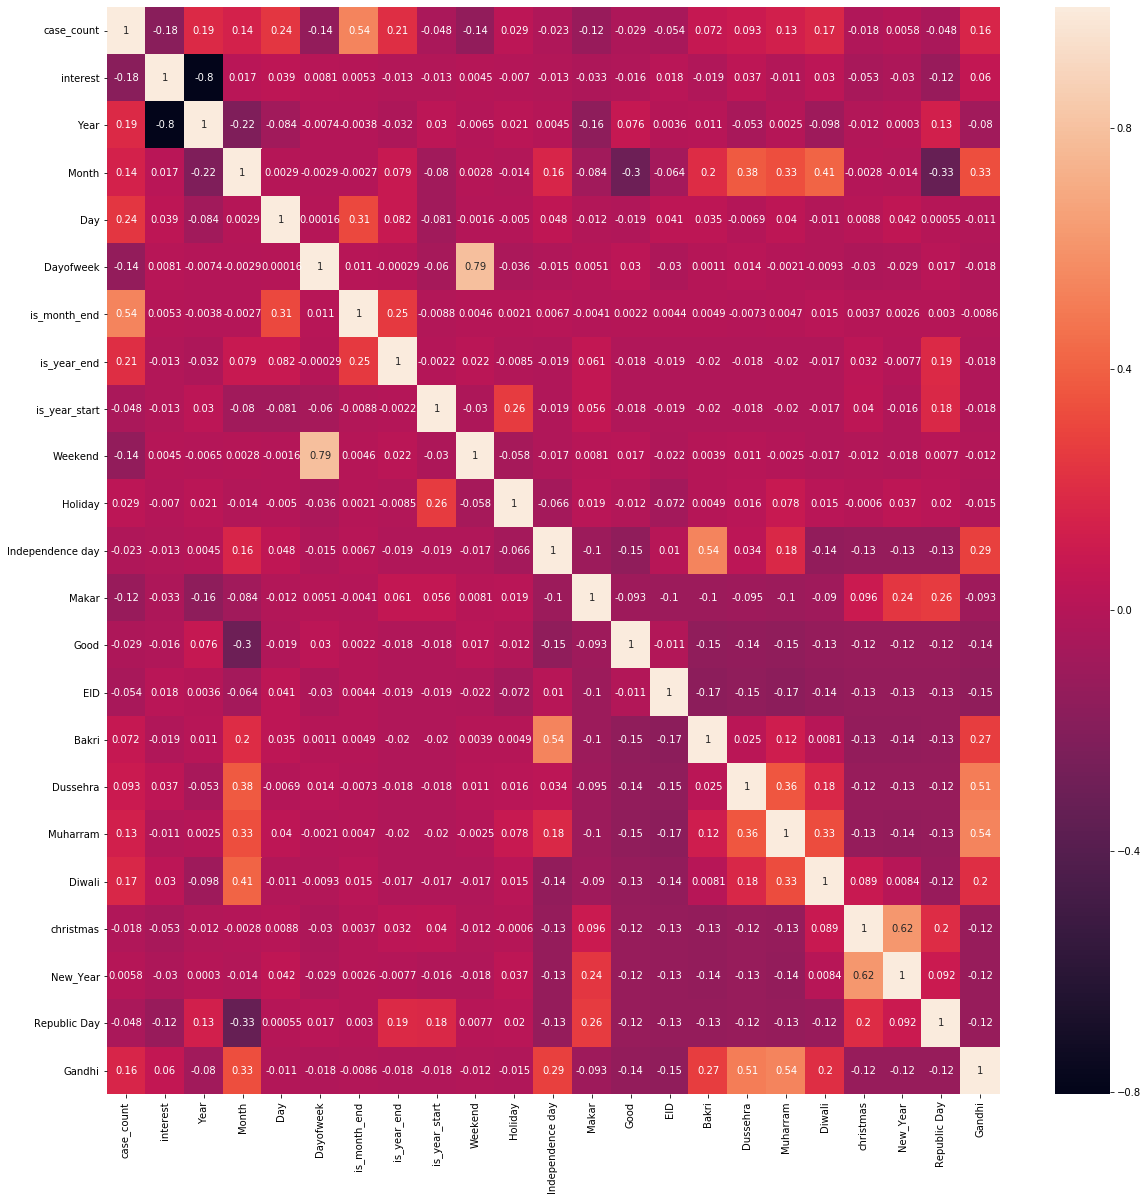

In [2248]:
plt.figure(figsize=(20,20))
sns.heatmap(total0.corr(),annot=True)

In [2549]:
total0.drop(columns=['segment','case_count'],inplace=True)
total1.drop(columns=['segment','case_count'],inplace=True)

In [2550]:
d0 = pd.get_dummies(data=total0,columns=['Month','Dayofweek'])
d1 = pd.get_dummies(data=total1,columns=['Month','Dayofweek'])

In [190]:
for i in a0_xgb:
    del d0[i]
for j in a1_xgb:
    del d1[j]

In [2551]:
l1=total_train0.shape[0]
l2=total_train1.shape[0]
train1=d0.iloc[:l1,:]
test1=d0.iloc[l1:,:]
train2=d1.iloc[:l2,:]
test2=d1.iloc[l2:,:]

In [23]:
l=dftrain.shape[0]
train1=total.iloc[:l,:]
test1=total.iloc[l:,:]

NameError: name 'total' is not defined

In [2552]:
test1.columns

Index(['Year', 'Day', 'Dayofyear', 'is_month_end', 'is_year_end',
       'is_year_start', 'Weekend', 'Holiday', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Dayofweek_0', 'Dayofweek_1',
       'Dayofweek_2', 'Dayofweek_3', 'Dayofweek_4', 'Dayofweek_5',
       'Dayofweek_6'],
      dtype='object')

In [2553]:
test2.columns

Index(['Year', 'Day', 'Dayofyear', 'is_month_end', 'is_year_end',
       'is_year_start', 'Weekend', 'Holiday', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Dayofweek_0', 'Dayofweek_1',
       'Dayofweek_2', 'Dayofweek_3', 'Dayofweek_4', 'Dayofweek_5',
       'Dayofweek_6'],
      dtype='object')

In [2292]:
train2.pivot_table(index='interest',values='case_count',aggfunc=np.sum)

,case_count
interest,
9.40,1832306.0
9.45,8940054.0
9.55,1378507.0
9.60,574204.0


In [2455]:
train_x0,valid_x0 = train1.loc[train1.index <= '31-12-2018'],train1.loc[train1.index > '31-12-2018']
train_x1,valid_x1 = train2.loc[train2.index <= '31-12-2018'],train2.loc[train2.index > '31-12-2018']
target_train_x0, target_valid_x0 = target0.iloc[:train_x0.shape[0]],target0.iloc[train_x0.shape[0]:]
target_train_x1, target_valid_x1 = target1.iloc[:train_x1.shape[0]],target1.iloc[train_x1.shape[0]:]

In [2554]:
from sklearn.model_selection import train_test_split
train_x0, valid_x0, target_train_x0, target_valid_x0 = train_test_split(train1,target0, test_size = 0.2, random_state = 1729)
train_x1, valid_x1, target_train_x1, target_valid_x1 = train_test_split(train2,target1, test_size = 0.2, random_state = 1729)

### LightGBM for Business Case 1

In [2567]:
from lightgbm import LGBMRegressor
n=LGBMRegressor(n_estimators=30000,random_state=1729,learning_rate=0.016,n_jobs=4)
# ,max_depth=3
n.fit(train_x0,target_train_x0,eval_set=[(train_x0,target_train_x0),(valid_x0, target_valid_x0)],eval_metric='mae',early_stopping_rounds=500,verbose=200)

Training until validation scores don't improve for 500 rounds
[200]	training's l1: 479.03	training's l2: 1.14219e+06	valid_1's l1: 753.855	valid_1's l2: 2.69156e+06
[400]	training's l1: 408.912	training's l2: 885940	valid_1's l1: 731.331	valid_1's l2: 2.61925e+06
[600]	training's l1: 382.193	training's l2: 752617	valid_1's l1: 734.906	valid_1's l2: 2.62329e+06
[800]	training's l1: 359.675	training's l2: 638038	valid_1's l1: 734.928	valid_1's l2: 2.61964e+06
Early stopping, best iteration is:
[390]	training's l1: 410.828	training's l2: 893789	valid_1's l1: 730.461	valid_1's l2: 2.61968e+06


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.016, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=30000, n_jobs=4, num_leaves=31, objective=None,
              random_state=1729, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### LightGBM for Business Case 2

In [2580]:
m=LGBMRegressor(n_estimators=30000,random_state=1729,learning_rate=0.015,n_jobs=4)
# max_depth=8
m.fit(train_x1,target_train_x1,eval_set=[(train_x1,target_train_x1),(valid_x1, target_valid_x1)],eval_metric='mae',early_stopping_rounds=500,verbose=200)

Training until validation scores don't improve for 500 rounds
[200]	training's l1: 1965.85	training's l2: 7.40798e+06	valid_1's l1: 2074.32	valid_1's l2: 7.38178e+06
[400]	training's l1: 1398.1	training's l2: 4.16398e+06	valid_1's l1: 1764.65	valid_1's l2: 6.19822e+06
[600]	training's l1: 1202.82	training's l2: 3.07095e+06	valid_1's l1: 1769.31	valid_1's l2: 6.2779e+06
[800]	training's l1: 1089.94	training's l2: 2.49e+06	valid_1's l1: 1793.58	valid_1's l2: 6.45452e+06
[1000]	training's l1: 994.029	training's l2: 2.07131e+06	valid_1's l1: 1798.99	valid_1's l2: 6.47252e+06
Early stopping, best iteration is:
[505]	training's l1: 1275.21	training's l2: 3.47125e+06	valid_1's l1: 1748.31	valid_1's l2: 6.16506e+06


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.015, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=30000, n_jobs=4, num_leaves=31, objective=None,
              random_state=1729, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### XGBoost for Business Case 1

In [2696]:
from xgboost import XGBRegressor
p=XGBRegressor(n_estimators=30000,random_state=1729,learning_rate=0.011,max_depth=4,n_jobs=4)
# max_depth=5,0.018
p.fit(train_x0,target_train_x0,eval_set=[(train_x0,target_train_x0),(valid_x0, target_valid_x0)],eval_metric='mae',early_stopping_rounds=500,verbose=200)

[22:11:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:2677.89	validation_1-mae:2714.18
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 500 rounds.
[200]	validation_0-mae:622.843	validation_1-mae:958.569
[400]	validation_0-mae:427.87	validation_1-mae:854.238
[600]	validation_0-mae:349.797	validation_1-mae:808.892
[800]	validation_0-mae:307.188	validation_1-mae:788.574
[1000]	validation_0-mae:279.657	validation_1-mae:773.741
[1200]	validation_0-mae:260.267	validation_1-mae:769.537
[1400]	validation_0-mae:243.037	validation_1-mae:767.703
[1600]	validation_0-mae:228.862	validation_1-mae:769.111
[1800]	validation_0-mae:217.896	validation_1-mae:768.535
Stopping. Best iteration:
[1381]	validation_0-mae:244.548	validation_1-mae:767.346



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.011, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=30000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=1729,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### XGBoost for Business Case 2

In [2697]:
q=XGBRegressor(n_estimators=30000,random_state=1729,learning_rate=0.017,max_depth=5,n_jobs=4)
# ,max_depth=5,0.018
q.fit(train_x1,target_train_x1,eval_set=[(train_x1,target_train_x1),(valid_x1, target_valid_x1)],eval_metric='mae',early_stopping_rounds=200,verbose=200)

[22:11:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:15076.1	validation_1-mae:13824.8
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
[200]	validation_0-mae:1637.49	validation_1-mae:1961.19
[400]	validation_0-mae:1135.37	validation_1-mae:1683.3
[600]	validation_0-mae:909.877	validation_1-mae:1665.77
Stopping. Best iteration:
[567]	validation_0-mae:937.622	validation_1-mae:1662.85



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.017, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=30000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=1729,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

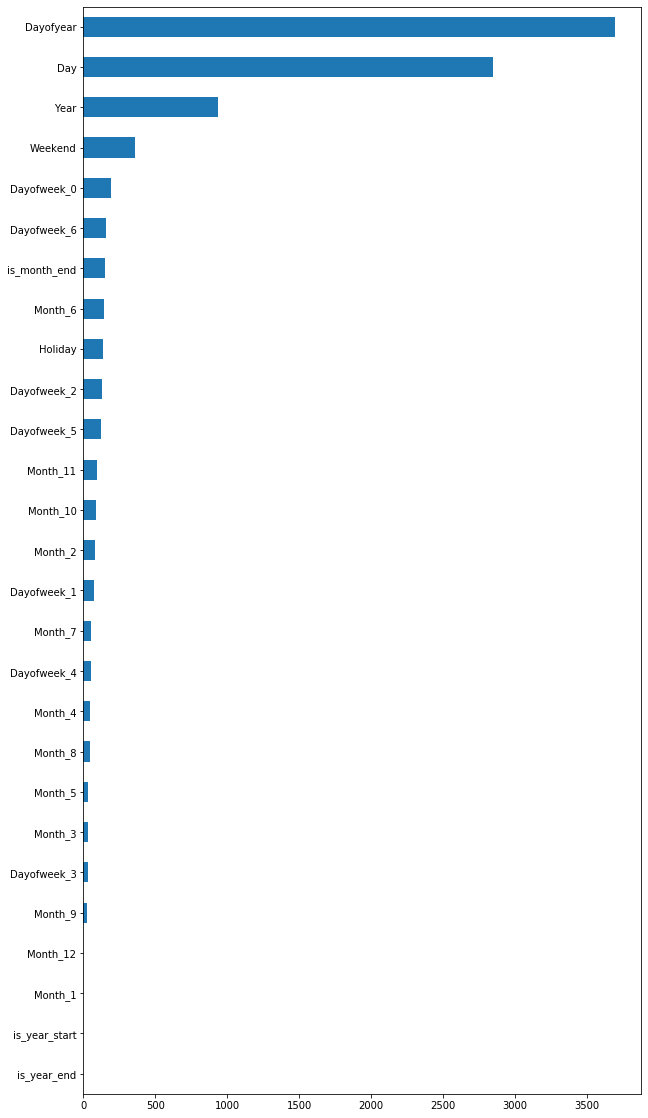

In [2620]:
plt.figure(figsize=(10,20))

feat_importances = pd.Series(n.feature_importances_, index=train_x0.columns)
feat_importances.nsmallest(130).plot(kind='barh')

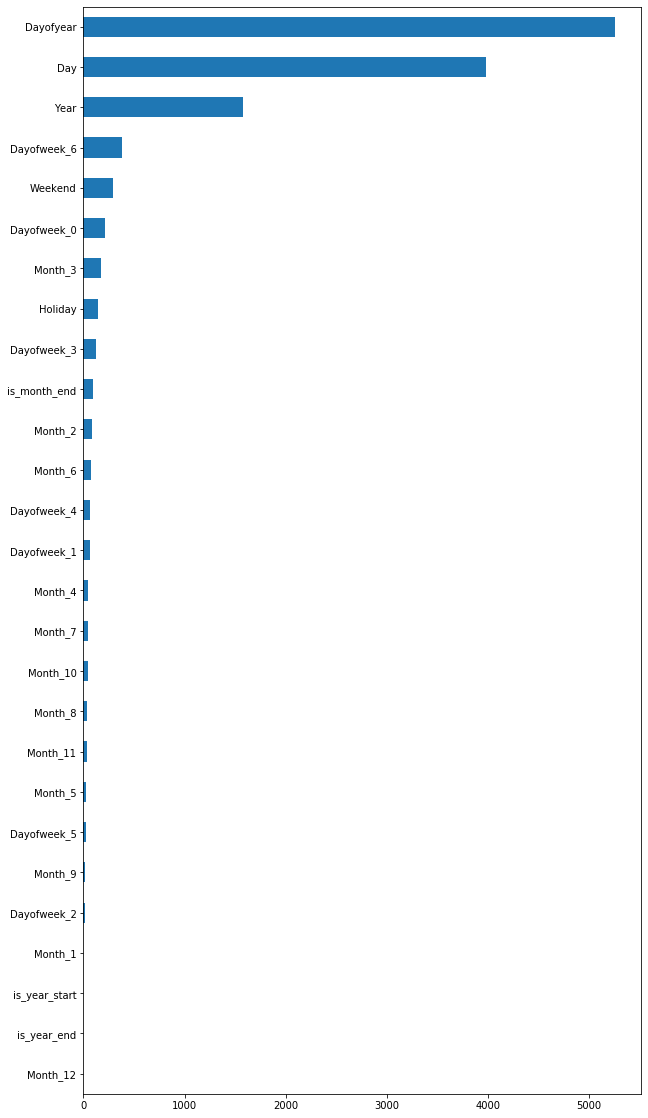

In [2621]:
plt.figure(figsize=(10,20))

feat_importances = pd.Series(m.feature_importances_, index=train_x1.columns)
feat_importances.nsmallest(130).plot(kind='barh')

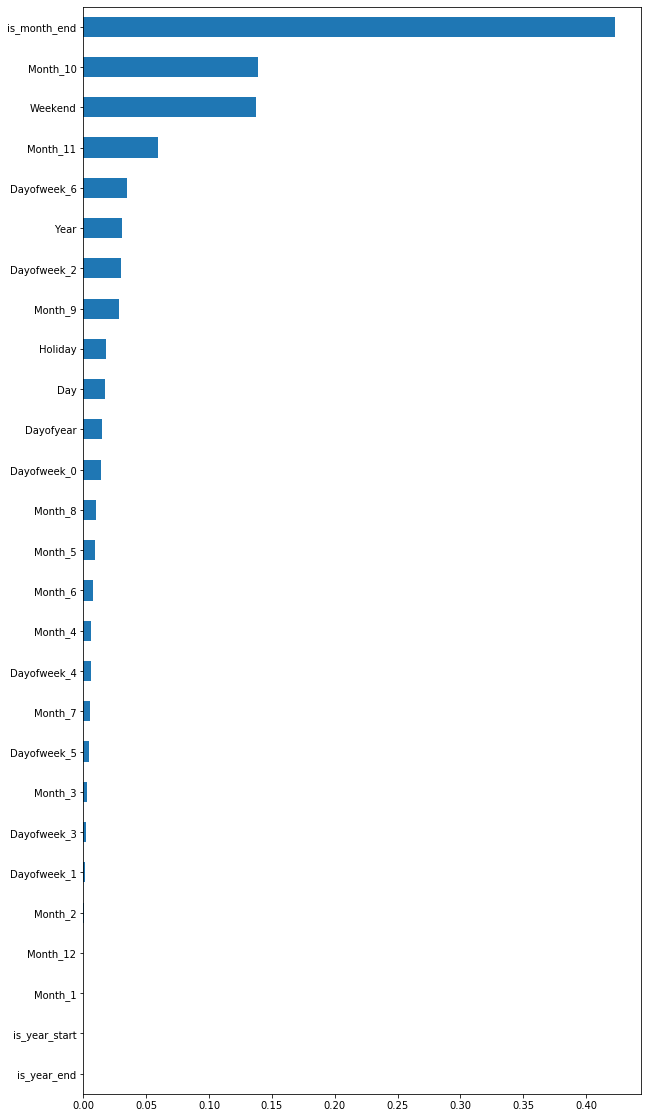

In [2622]:
plt.figure(figsize=(10,20))

feat_importances = pd.Series(p.feature_importances_, index=train_x0.columns)
feat_importances.nsmallest(130).plot(kind='barh')

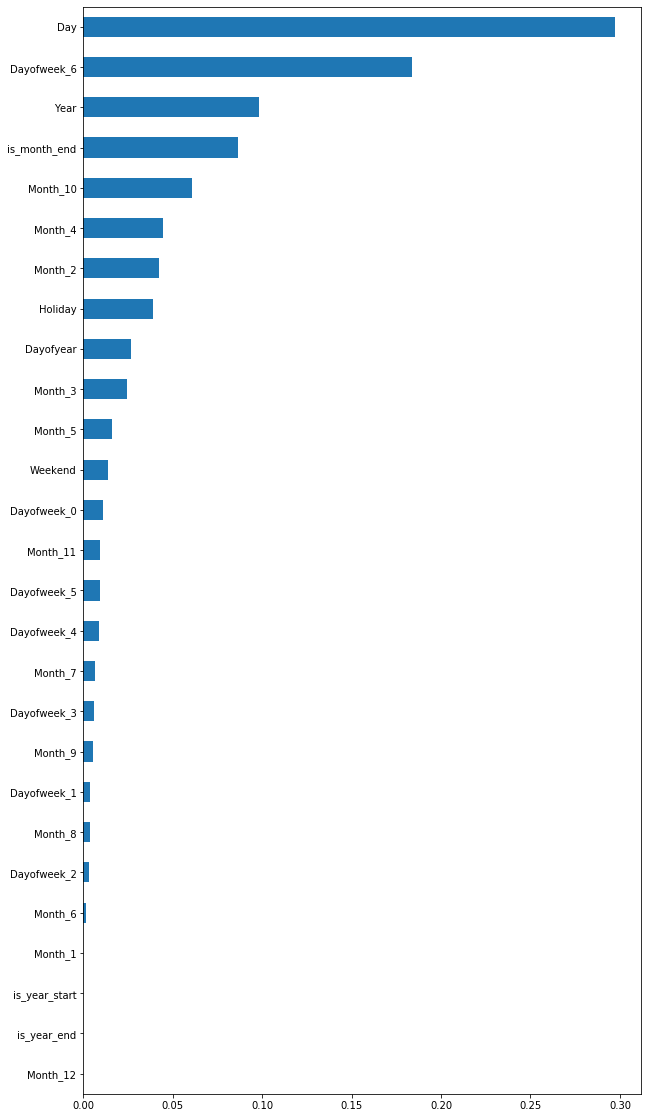

In [2623]:
plt.figure(figsize=(10,20))

feat_importances = pd.Series(q.feature_importances_, index=train_x1.columns)
feat_importances.nsmallest(130).plot(kind='barh')

In [2627]:
feat_imp = pd.DataFrame(list(zip(train_x1,q.feature_importances_)),columns =['feature','importance'])
feat_imp.sort_values(by='importance',inplace=True,ascending=False)
x=feat_imp[feat_imp['importance']==0]['feature'].tolist()
len(x)

4

In [2698]:
pred0_lgb = n.predict(test1)
pred1_lgb = m.predict(test2)
pred0_xgb = p.predict(test1)
pred1_xgb = q.predict(test2)

In [2699]:
len(pred1_xgb)

93

In [2700]:
res = []
res.extend(pred0_xgb)
res.extend(pred1_xgb)

In [2701]:
res

[981.7606,
 30.681416,
 2683.4268,
 1790.5255,
 2017.9578,
 1809.8678,
 2025.7507,
 1319.1516,
 329.09128,
 2715.411,
 1947.297,
 2168.7297,
 1926.1543,
 1936.0343,
 1033.99,
 99.82755,
 2505.3901,
 1751.8262,
 1970.9442,
 1787.9652,
 1797.8452,
 1033.99,
 143.16464,
 2578.704,
 1936.9768,
 10578.015,
 1020.49915,
 797.73627,
 1473.8534,
 550.48505,
 3063.6262,
 2207.121,
 2624.861,
 2403.063,
 2412.944,
 1626.1498,
 545.0407,
 2796.6428,
 2720.7317,
 2908.8308,
 2088.4885,
 2687.2104,
 1909.1951,
 805.6515,
 3109.443,
 2609.4033,
 2801.5295,
 2622.8206,
 2657.7092,
 1899.7969,
 847.4769,
 3060.7197,
 2558.9695,
 2708.1045,
 2590.7375,
 2866.845,
 6002.1396,
 -218.06587,
 1961.1139,
 2331.5688,
 2562.906,
 2283.1882,
 2046.5337,
 1470.3274,
 557.7095,
 2626.6543,
 1901.0054,
 3353.7122,
 3600.706,
 3603.1343,
 2961.5054,
 2082.7207,
 3618.4739,
 3523.785,
 3699.009,
 3509.3696,
 3401.125,
 2774.7512,
 1912.5323,
 4047.055,
 3339.9377,
 3547.8503,
 3373.7896,
 3376.2178,
 2809.554,
 181

In [2677]:
len(pred1_xgb)

93

In [2690]:
a1 =  pd.DataFrame(list(zip(np.arange(1,181),test['application_date'],test.segment,res)), columns =['id','application_date','segment','case_count'])

In [2691]:
a1.to_csv('27jan_date_xgb390,.16+lgb505,.15.csv',index=False)

In [1633]:
a1

,id,application_date,segment,case_count
0,1,2019-07-06,1,1855.928467
1,2,2019-07-07,1,1194.203613
2,3,2019-07-08,1,936.747742
3,4,2019-07-09,1,636.234741
4,5,2019-07-10,1,831.071533
5,6,2019-07-11,1,730.858154
6,7,2019-07-12,1,698.797485
7,8,2019-07-13,1,1902.632935
8,9,2019-07-14,1,1234.373047
9,10,2019-07-15,1,905.710266
